# Assignment 03 - making a pie chart from email domain data

After reading in the data and creating a data frame, I called the head() method to inspect the basic shape of the dataset and to see the first few rows. It was all in one column and the data was being cut off, so I printed out the first row only using print(domain_data_df[0][0]), and was able to view the variable names (Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title) in full without them being cut off.

I decided that to create a useful pie chart, i.e one that was readable and communicated some interesting data, I would have to use the email domains as a numerical variable to look at the number of email domains by gender, age, etc.

I went back and specified the columns and index for my dataframe, and then moved on to converting the date of birth data into useable intergers.

I decided I would need a function to iterate through the rows and take the year from the date of birth, e.g 1996, and convert that number into an age, and then update the row value. I referred to this [stack overflow discussion](https://stackoverflow.com/questions/2217488/age-from-birthdate-in-python/9754466#9754466) in figuring out how to do this, and asked copilot to explain a part of the suggested code for me. What resulted was a very lightweight function that subtracted the birth year from the current year (determined using datetime module), and then subtracted a boolean value (which I learned is either equal to 0 or 1 numerically) depending on whether the birthday had been reached yet this year, ensuring the age wouldn't be overestimated.

I was getting an error due to the fact that the Date of birth data wasn't properly formatted for the datetime module, so I used pd.to_datetime to rectify that, and then used my function on each row of the Date of birth data, creating a new column called 'Age' for the converted values.

When creating my pie chart, I realised the ages probably needed to be grouped into ranges for readability.



In [1]:
import pandas as pd
from datetime import datetime, date
from matplotlib import pyplot as plt

([<matplotlib.patches.Wedge at 0x1db3a90d850>,
 [Text(0.9324457240113389, 0.583562311816802, '0-25'),
  Text(-0.2835881413646196, 1.0628159605864793, '25-50'),
  Text(-1.092170863996472, -0.13100688469389568, '50-75'),
  Text(0.44635778463918263, -1.0053679565671472, '75 and above')])

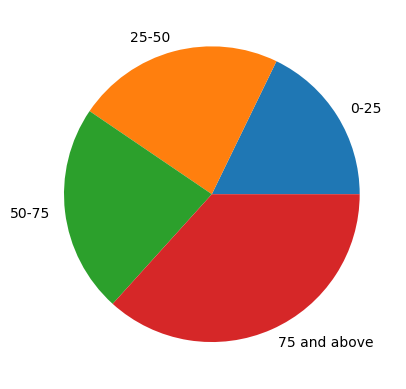

In [2]:
# reading in data
file_path = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

domain_data_df = pd.read_csv(file_path, usecols=(['Email', 'Date of birth']))

# below I define a function that converts date of birth to age by calculating the difference between current date and date of birth
# it does this by subtracting the year of birth from the current year, and then either subtracting 1 or 0 from the result depending on whether the birthday has been reached yet
# i.e whether the current day and month is less than the birth day and month or not (1 or 0)
def age_conversion(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# converting 'Date of birth' data to datetime format
domain_data_df['Date of birth'] = pd.to_datetime(domain_data_df['Date of birth'], yearfirst=True)

# applying age_conversion function to each row in Date of birth column and create new Age column based on converted values
domain_data_df['Age'] = domain_data_df['Date of birth'].apply(age_conversion)

# before creating the pie chart, I will segment the ages into ranges using the below function, which iterates through the dataset and counts how many people fall into each age range

age_0_25 = 0
age_25_50 = 0
age_50_75 = 0
age_75_above = 0

for age in domain_data_df['Age']:
        if age < 25:
            age_0_25 = age_0_25 + 1
        elif 25 <= age < 50:
            age_25_50 = age_25_50 + 1
        elif 50 <= age < 75:
            age_50_75 = age_50_75 + 1
        else:
            age_75_above = age_75_above + 1       

fig = plt.figure()
labels = ['0-25', '25-50', '50-75', '75 and above']
plt.pie([age_0_25, age_25_50, age_50_75, age_75_above], labels=labels)
                                                 







